<div class='alert alert-info'>
    <h1><center><font color='Darkblue'>Cross Validation</font></center></h1>
</div>

# <font color='#FF33A1'> What is Cross Validation?<font>

        Cross-validation is a resampling technique used to evaluate model performance and ensure that the model generalizes well to unseen data.It helps to check if the model is overfitting or underfitting by splitting the dataset into multiple parts and training / testing the model on different subsets.

# <font color='#FF33A1'>🔷 Why Cross Validation?<font>
        1.To assess how well a model will perform on unseen data.

        2.To avoid overfitting (model performs well on training data but poorly on test data).

        3.To make the best use of available data, especially when the dataset is small.
            
        4.To get a robust estimate of model performance by averaging results across multiple splits.

                Usually ,we take a dataset ,split into train and test sets.We use the traning set to train the model and test to evaluate the performance of the model.But it is not a good approach as in production,the model would come across data quite different from the test set.Which eventually lead to degrading the performance of the model ,making our evaluation faulty.To solve this problem,we can use the cross-validation techniques.

# <font color='#FF33A1'> Types of Cross-Validation</font>

## 1.Repeated K fold :
        Repeats K-Fold CV multiple times to reduce variance of the estimate.
## 2.Leave One out Cross Validation(LOOCv):
        Each sample is used once as test data, and the rest as training data (very exhaustive).
## 3.Shuffle and split
## 4.Straitfield K Fold:
            Like K-Fold but preserves the percentage of samples for each class (useful for classification).
## 5.Times Series Split
## 6.K-fold Cross Validation:
        Split data into K subsets (folds); train on K-1 folds, test on the remaining fold. Repeat K times.

# <font color='#FF33A1'>🔷 K-Fold Cross Validation: Detailed Explanation</font>

        In K-fold Cross validation,the traning set is randomly split into K(usually between 5 to 10) subsets known as folds.where K-1 foldss are used to train the model and the other fold is used to test the model.This technique improves the high variance problem in a dataset as we are randomly selecting the traning and testing test folds .The steps required to perform K-folds cross-validation are given below:

### Step1: 
        1.Split the entire data randomly in k folds (usually between 5 to 10).The higher number of splits leads to a leass biased model.
## Step2:
        2.Iterate K times:
                    *In each iteration, 1 fold is used as test, and remaining K-1 folds as training.
## Step 3:
        5.Repeat step 2 until evry k-fold serves as test set.
## Step4:                 
        3.Train and evaluate the model in each iteration.
        4.Average the performance metrics (e.g., accuracy, RMSE) over all K iterations.



### <center>All Data </center>

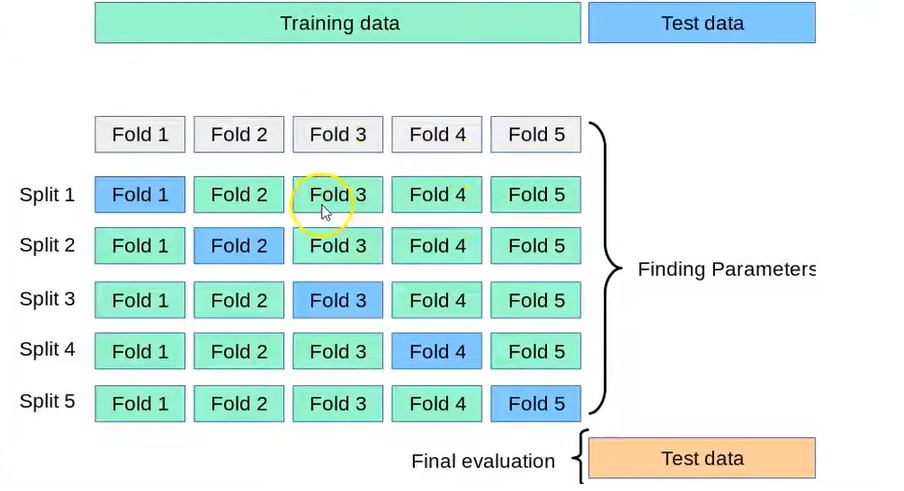

In [3]:
from PIL import Image
Image.open('s168.png')

In [ ]:
Iteration 1: [Test] Fold1 | [Train] Fold2, Fold3, Fold4, Fold5  
Iteration 2: [Test] Fold2 | [Train] Fold1, Fold3, Fold4, Fold5  
Iteration 3: [Test] Fold3 | [Train] Fold1, Fold2, Fold4, Fold5  
Iteration 4: [Test] Fold4 | [Train] Fold1, Fold2, Fold3, Fold5  
Iteration 5: [Test] Fold5 | [Train] Fold1, Fold2, Fold3, Fold4  


# 🔷 Python Code Example —  Cross Validation

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns

In [42]:
dataset=pd.read_csv('Social_Network_Ads.csv')

In [43]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [44]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [45]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,-1].values

In [46]:
X[0]

array([   19, 19000], dtype=int64)

In [47]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
x_train.shape

(320, 2)

In [50]:
x_test.shape

(80, 2)

In [52]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [53]:
y_pred=classifier.predict(x_test)

In [54]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

<Axes: >

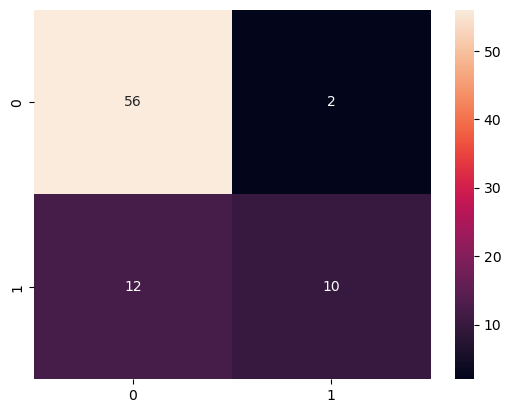

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [56]:
accuracy_score(y_test,y_pred)

0.825

In [58]:
# Perfoming the K-fold validation

from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)


In [59]:
accuracies

array([0.78125, 0.8125 , 0.75   , 0.78125, 0.8125 , 0.625  , 0.75   ,
       0.78125, 0.84375, 0.6875 ])

In [60]:
accuracies.mean()

0.7625

In [61]:
accuracies.std()

0.06123724356957945

In [ ]:
# depends on the average value of those 10cv ,we decide the model Performance.

In [65]:
import pandas as pd
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')

# Below are the three algo to be tested for accuracy.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Importing train_test_split

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


digits = load_digits()

inputcols = digits.data
outputcols = digits.target


x_train,x_test,y_train,y_test = train_test_split(inputcols,outputcols,test_size=0.2)

### Testing for Logistic regression

lrmodel =  LogisticRegression()
lrmodel.fit(x_train,y_train)
lrscore = lrmodel.score(x_test,y_test)
# print("Liner regression model score is ", lrscore)

### Testing for SVM

svmmodel =  SVC()
svmmodel.fit(x_train,y_train)
svmscore = svmmodel.score(x_test,y_test)
# print("SVM  model score is ", svmscore)


### Testing for randomforest

rfmodel =  RandomForestClassifier()
rfmodel.fit(x_train,y_train)
rfscore = rfmodel.score(x_test,y_test)
# print("random forest score is ", rfscore)

print("Linear Regression Score = " , lrscore)
print("SVM Score = " , svmscore)
print("Random Forest Score = " , rfscore)


## we can create a function which will take the model name , train and test data and return the score


# def getscore(model,xtrain,xtest,ytrain,ytest):
#     model.fit(xtrain,ytrain)
#     score = model.score(xtest,ytest)
#     return score

print("\n ===============================================================  \n")
print(dir(cross_val_score))
op = cross_val_score(RandomForestClassifier(),inputcols,outputcols)
print("Random Forest results = ", op)
op = cross_val_score(SVC(),inputcols,outputcols)
print("SVM results = ", op)
op = cross_val_score(LogisticRegression(),inputcols,outputcols)
print(" L R  results = ", op)

# defualt it will give 5 cv scores


Linear Regression Score =  0.95
SVM Score =  0.9833333333333333
Random Forest Score =  0.9611111111111111


['__annotations__', '__builtins__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__getstate__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__type_params__', '__wrapped__', '_skl_parameter_constraints']
Random Forest results =  [0.93888889 0.91111111 0.95264624 0.97214485 0.92479109]
SVM results =  [0.96111111 0.94444444 0.98328691 0.98885794 0.93871866]
 L R  results =  [0.92222222 0.86944444 0.94150418 0.93871866 0.89693593]


# Implemenation of K-fold validation

In [63]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_digits
import numpy as np

# Load sample dataset
digits = load_digits()

X = digits.data
y = digits.target
# Define model
model = LinearRegression()

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get scores (e.g., R^2 score)
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Output scores and average
print("Cross-validation scores:", scores)
print("Average R^2 score:", np.mean(scores))


Cross-validation scores: [0.5779769  0.60602265 0.55079985 0.61195636 0.49637178]
Average R^2 score: 0.5686255078869357


# <font color='#FF33A1'>🔷 Key Points in K-Fold CV</font>
##### <font color='green'>1.shuffle=True:</font> To shuffle data before splitting (for better randomness).
##### <font color='green'>2.random_state=42:</font> To make splits reproducible.
##### <font color='green'>3.scoring='r2':</font> Metric to evaluate performance (can use accuracy, precision, recall, etc. depending on task).

# <font color='#FF33A1'>🔷 Advantages of Cross Validation</font>
        1.Reduces bias (due to multiple splits).
        2.Reduces variance (by averaging over splits).
        3.Utilizes entire dataset for training and testing (each point is tested once).
        4.Better Feature Extraction
        5.Improved Models for Imbalanced Data.
        


# <font color='#FF33A1'>🔷 Disadvantages<font>
        1.Computationally expensive, especially with large datasets.
        2.Not suitable for time series data (because of temporal dependence — need TimeSeriesSplit).


# <font color='#FF33A1'> TimesSeriesSplit</font>

# <font color='Darkblue'>🔷 What is TimeSeriesSplit?</font>
        1.TimeSeriesSplit is a cross-validation technique designed specifically for time series data in sklearn.
        
        2.It splits the data sequentially, so each fold's training set contains data up to a certain point in time, and the test set contains data that comes immediately after.


                It is a special variation of K-fold cross-validation to validate time series data samples,Observed at fixed time intervals.It returns first K folds as train set amd the (K+1)th set as test set.Unlike conventional k fold cross validation methods.successive traning sets are supersets of those that come before them.It also adds all surplus data to the first traning set that is always used to train the model.

# <font color='darkBlue'>🔷 Why is Time Series Cross Validation Different?</font>
        Unlike regular cross-validation (like K-Fold), time series data has a temporal order, and future data points cannot be used to predict the past. So, shuffling is not allowed, and splits must respect the chronological order.
        📅 Past → Future, not random!

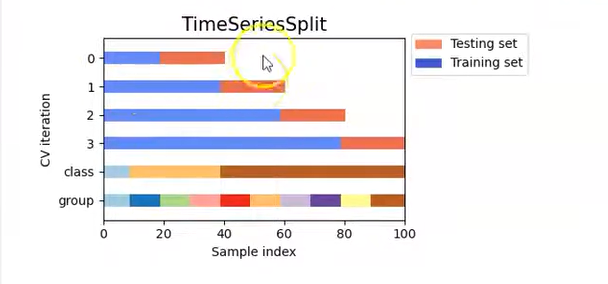

In [10]:
Image.open('s169.png')

        Here we have taken one time series dataset ,In that first split(0) day 1 is train and here we predict day 2 and in next step we use day 1 and day 2 as train the model and predict the day 3.....It will goes like this.

# <font color='Darkblue'>🔷 📊 How does TimeSeriesSplit Work? (Example with 5 splits)<font>
#### Assume you have 10 data points: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

 <table>
    <tr>
        <th>Split</th>
        <th>Training Set</th>
        <th>Testing Set</th>
    </tr>
    <tr>
        <td>1</td>
        <td>[1,2]</td>
        <td>[3,4]</td>
    </tr>
    <tr>
        <td>2</td>
        <td>[1, 2, 3, 4]</td>
        <td>[5,6]</td>
    </tr>
    <tr>
        <td>3</td>
        <td>[1, 2, 3, 4, 5, 6]</td>
        <td>[7,8]</td>
    </tr>
    <tr>
        <td>4</td>
        <td>[1, 2, 3, 4, 5, 6, 7, 8]</td>
        <td>[9,10]</td>
    </tr>
        
</table>

        1.Notice that each training set grows, and testing set slides forward without overlapping previous test sets.
        2.This respects the temporal nature of data.

# 🔷 Python Code Example — TimeSeriesSplit

In [17]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Sample data
data = np.arange(10)  # Data points [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=4)

# Show train/test indices for each split
for train_index, test_index in tscv.split(data):
    print("Train:", train_index, "Test:", test_index)


Train: [0 1] Test: [2 3]
Train: [0 1 2 3] Test: [4 5]
Train: [0 1 2 3 4 5] Test: [6 7]
Train: [0 1 2 3 4 5 6 7] Test: [8 9]


## 🔷 Using TimeSeriesSplit for Model Validation


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
import numpy as np

# Example features and target
X = np.arange(100).reshape(-1, 1)  # Feature
y = np.arange(100)  # Target

# Model
model = LinearRegression()

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Cross-validation scores
scores = cross_val_score(model, X, y, cv=tscv, scoring='r2')

print("R2 scores for each split:", scores)
print("Average R2 score:", np.mean(scores))


R2 scores for each split: [1. 1. 1. 1. 1.]
Average R2 score: 1.0


# <font color='Darkblue'>🔷 Advantages of TimeSeriesSplit<font>
        1.Respects temporal order (essential for time series data).
        2.Prevents data leakage from future to past.
        3.Provides a realistic estimate of performance on unseen future data.

# <font color='Darkblue'>🔷 Limitations<font>
        1.Since the training set grows with each split, early splits might have small training data, leading to high variance.
        2.Cannot shuffle, so if initial data is noisy, initial splits might give poor results.
